# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Save config information.
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "metric"

# Build partial query URL
#query_url = f"{url}appid={api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
                        "City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date
        })
       
        #print(city_data)
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vadso
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | uturoa
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | chongjin
Processing Record 6 of Set 1 | puerto leguizamo
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | molochnoye
Processing Record 10 of Set 1 | medina de rioseco
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | yaren
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | lihue
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | hami
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | nouadhibou
Processing Record 20 of Set 1 | birao
Processing Record 21 of Set 1 | tazacorte
Processing Record 22 of Set 1 | vilyuchinsk
Proces

Processing Record 40 of Set 4 | kuqa
Processing Record 41 of Set 4 | qui nhon
Processing Record 42 of Set 4 | castillos
Processing Record 43 of Set 4 | la passe
Processing Record 44 of Set 4 | sur
Processing Record 45 of Set 4 | kalmunai
Processing Record 46 of Set 4 | badger
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | soio
Processing Record 49 of Set 4 | los osos
Processing Record 0 of Set 5 | gabu
Processing Record 1 of Set 5 | bellavista
Processing Record 2 of Set 5 | vakarai
Processing Record 3 of Set 5 | bilibino
Processing Record 4 of Set 5 | argo
Processing Record 5 of Set 5 | vallenar
Processing Record 6 of Set 5 | la ronge
Processing Record 7 of Set 5 | revda
Processing Record 8 of Set 5 | nemuro
Processing Record 9 of Set 5 | prince rupert
Processing Record 10 of Set 5 | lebu
Processing Record 11 of Set 5 | colesberg
Processing Record 12 of Set 5 | camocim
Processing Record 13 of Set 5 | tolanaro
Processing Record 14 of Set 5 | kailua-kona
Processing

Processing Record 34 of Set 8 | hanover
Processing Record 35 of Set 8 | los andes
Processing Record 36 of Set 8 | guanica
Processing Record 37 of Set 8 | gorom-gorom
Processing Record 38 of Set 8 | tarawa
Processing Record 39 of Set 8 | strathmore
Processing Record 40 of Set 8 | vila velha
Processing Record 41 of Set 8 | zinjibar
Processing Record 42 of Set 8 | kirkwall
Processing Record 43 of Set 8 | ittiri
Processing Record 44 of Set 8 | labrador city
Processing Record 45 of Set 8 | robbah
Processing Record 46 of Set 8 | egilsstadir
Processing Record 47 of Set 8 | geraldton
Processing Record 48 of Set 8 | alice springs
Processing Record 49 of Set 8 | toga village
City not found. Skipping...
Processing Record 0 of Set 9 | prainha
Processing Record 1 of Set 9 | gopalganj
Processing Record 2 of Set 9 | nieuw amsterdam
Processing Record 3 of Set 9 | tamanrasset
Processing Record 4 of Set 9 | ushtobe
Processing Record 5 of Set 9 | paradip garh
Processing Record 6 of Set 9 | selfoss
Proces

Processing Record 25 of Set 12 | borba
Processing Record 26 of Set 12 | necochea
Processing Record 27 of Set 12 | mar del plata
Processing Record 28 of Set 12 | kudymkar
Processing Record 29 of Set 12 | forster
Processing Record 30 of Set 12 | katsuura
Processing Record 31 of Set 12 | eyl
Processing Record 32 of Set 12 | colonia
Processing Record 33 of Set 12 | capao da canoa
Processing Record 34 of Set 12 | imuris
Processing Record 35 of Set 12 | son ferrer
City not found. Skipping...
Processing Record 36 of Set 12 | sao joao da barra
Processing Record 37 of Set 12 | enewetak
Processing Record 38 of Set 12 | lorengau
Processing Record 39 of Set 12 | la paz
Processing Record 40 of Set 12 | stromstad
City not found. Skipping...
Processing Record 41 of Set 12 | palu
Processing Record 42 of Set 12 | torghay
Processing Record 43 of Set 12 | pemangkat
Processing Record 44 of Set 12 | nyurba
Processing Record 45 of Set 12 | kourou
Processing Record 46 of Set 12 | pionerskiy
Processing Record

In [45]:
city_data

[{'City': 'vadso',
  'Lat': 70.0744,
  'Lng': 29.7487,
  'Max Temp': -9.91,
  'Humidity': 79,
  'Cloudiness': 40,
  'Wind Speed': 4.63,
  'Country': 'NO',
  'Date': 1702343115},
 {'City': 'puerto ayora',
  'Lat': -0.7393,
  'Lng': -90.3518,
  'Max Temp': 24.25,
  'Humidity': 85,
  'Cloudiness': 12,
  'Wind Speed': 2.86,
  'Country': 'EC',
  'Date': 1702343115},
 {'City': 'uturoa',
  'Lat': -16.7333,
  'Lng': -151.4333,
  'Max Temp': 26.87,
  'Humidity': 77,
  'Cloudiness': 100,
  'Wind Speed': 8.69,
  'Country': 'PF',
  'Date': 1702343054},
 {'City': 'waitangi',
  'Lat': -43.9535,
  'Lng': -176.5597,
  'Max Temp': 15.46,
  'Humidity': 89,
  'Cloudiness': 100,
  'Wind Speed': 3.58,
  'Country': 'NZ',
  'Date': 1702343116},
 {'City': 'chongjin',
  'Lat': 41.7956,
  'Lng': 129.7758,
  'Max Temp': -5.14,
  'Humidity': 68,
  'Cloudiness': 12,
  'Wind Speed': 0.41,
  'Country': 'KP',
  'Date': 1702343116},
 {'City': 'puerto leguizamo',
  'Lat': -0.1934,
  'Lng': -74.7819,
  'Max Temp': 23.85

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

Lat = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vadso,70.0744,29.7487,-9.91,79,40,4.63,NO,1702343115
1,puerto ayora,-0.7393,-90.3518,24.25,85,12,2.86,EC,1702343115
2,uturoa,-16.7333,-151.4333,26.87,77,100,8.69,PF,1702343054
3,waitangi,-43.9535,-176.5597,15.46,89,100,3.58,NZ,1702343116
4,chongjin,41.7956,129.7758,-5.14,68,12,0.41,KP,1702343116


In [26]:
city_data_df["Lat"].dtypes

dtype('float64')

In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vadso,70.0744,29.7487,-9.91,79,40,4.63,NO,1702343115
1,puerto ayora,-0.7393,-90.3518,24.25,85,12,2.86,EC,1702343115
2,uturoa,-16.7333,-151.4333,26.87,77,100,8.69,PF,1702343054
3,waitangi,-43.9535,-176.5597,15.46,89,100,3.58,NZ,1702343116
4,chongjin,41.7956,129.7758,-5.14,68,12,0.41,KP,1702343116


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

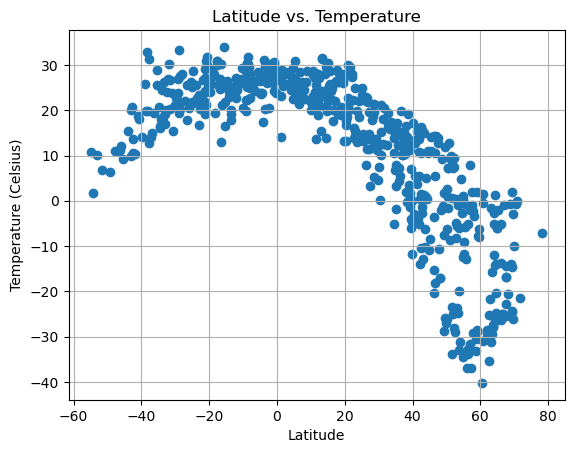

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

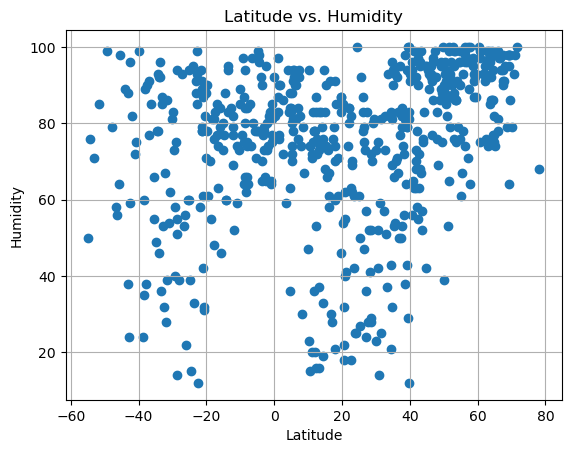

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

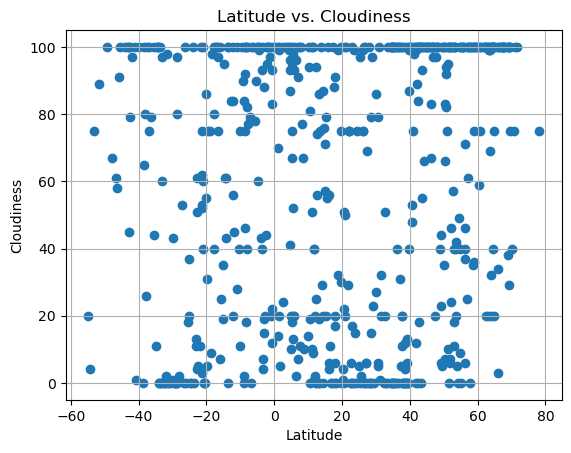

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

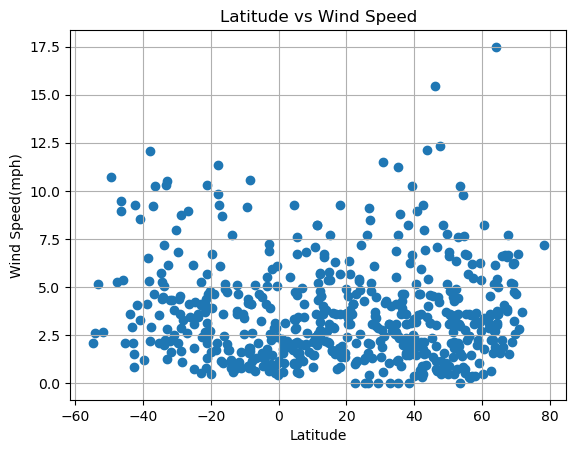

In [32]:
# Build the scatter plots for city_data_df["Lat"], city_data_df["Cloudiness"], marker="o"
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def line_regress(x_values, y_values, title, location):

    # Get regression values
    #regress_values = x_values * slope + intercept
    
    # Create line equation string
    #x_values = data
    #y_values = data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,10)) 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,location,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vadso,70.0744,29.7487,-9.91,79,40,4.63,NO,1702343115
4,chongjin,41.7956,129.7758,-5.14,68,12,0.41,KP,1702343116
8,molochnoye,59.2917,39.6787,-7.88,92,100,6.26,RU,1702343118
9,medina de rioseco,41.8833,-5.0441,10.78,92,100,5.95,ES,1702343118
10,georgetown,5.4112,100.3354,26.96,94,20,1.54,MY,1702342923


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto ayora,-0.7393,-90.3518,24.25,85,12,2.86,EC,1702343115
2,uturoa,-16.7333,-151.4333,26.87,77,100,8.69,PF,1702343054
3,waitangi,-43.9535,-176.5597,15.46,89,100,3.58,NZ,1702343116
5,puerto leguizamo,-0.1934,-74.7819,23.85,92,100,0.42,CO,1702343117
6,port-aux-francais,-49.3500,70.2167,6.46,99,100,10.74,TF,1702343117


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6955785248031143


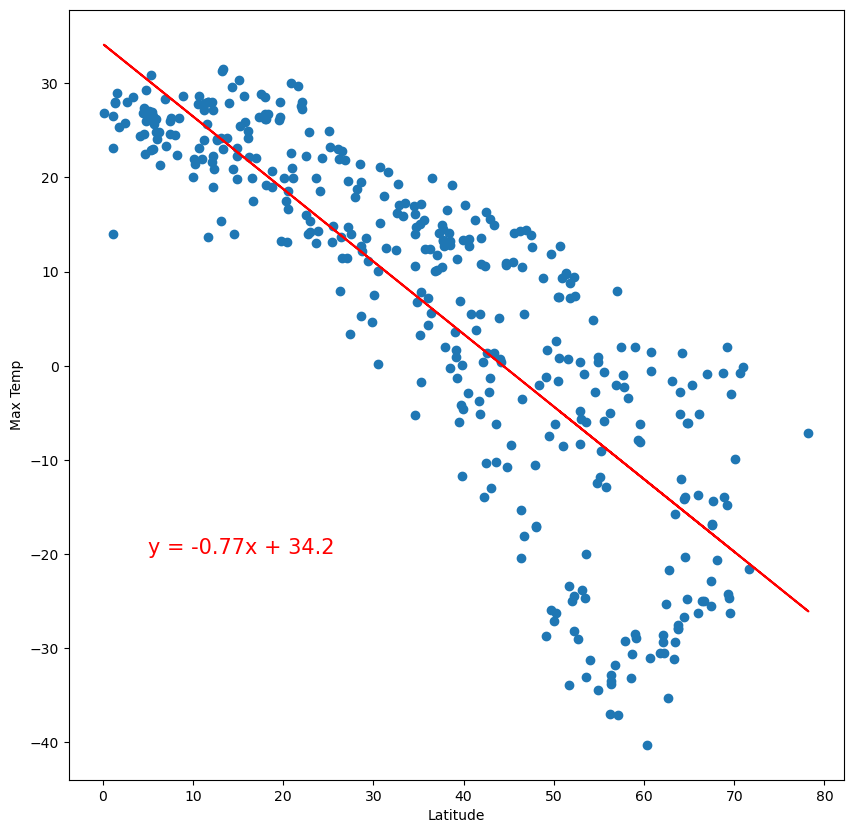

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Max Temp"
location = (5,-20)
line_regress(x_values, y_values, title, location)

The r-squared is: 0.4083507708086201


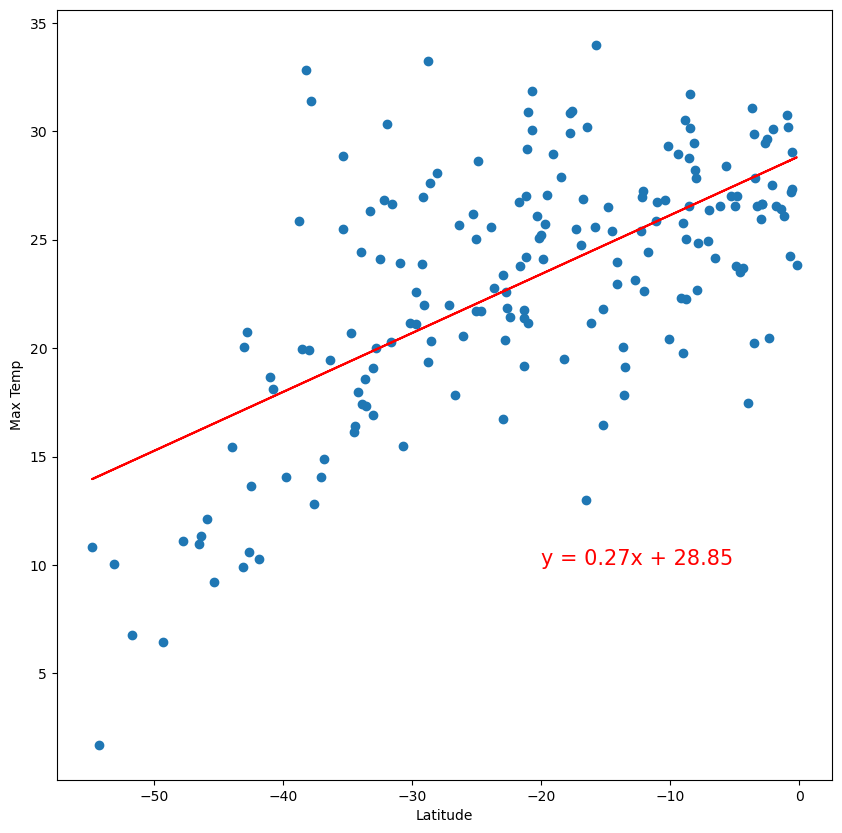

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Max Temp"
location = (-20,10)
line_regress(x_values, y_values, title, location)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.14444848257066692


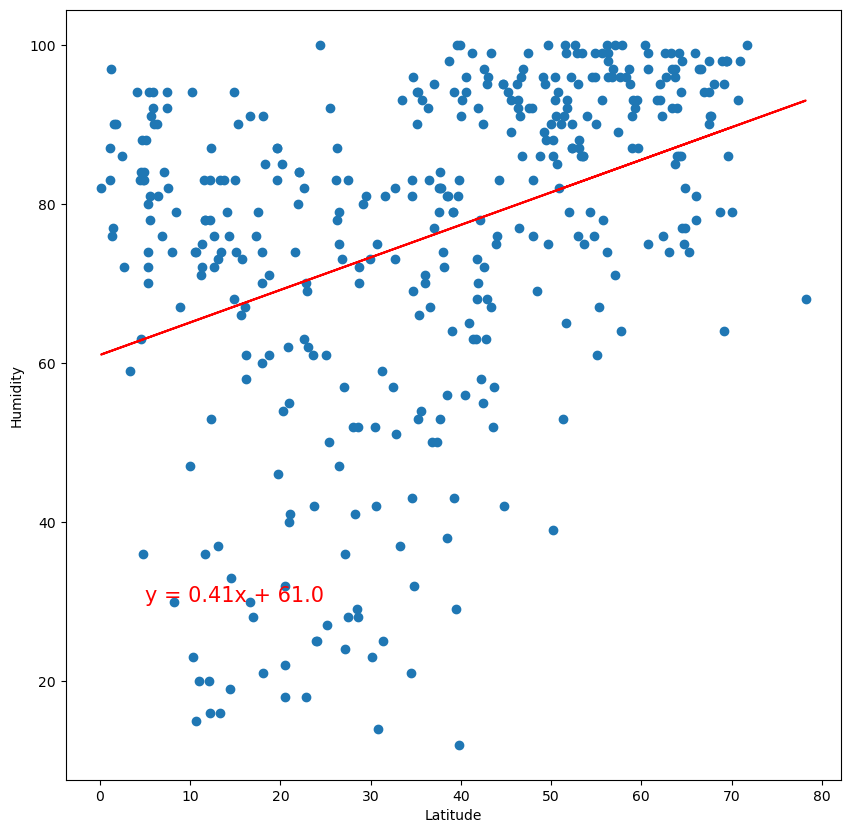

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = "Humidity"
location = (5,30)
line_regress(x_values, y_values, title, location)

The r-squared is: 0.04350874676662898


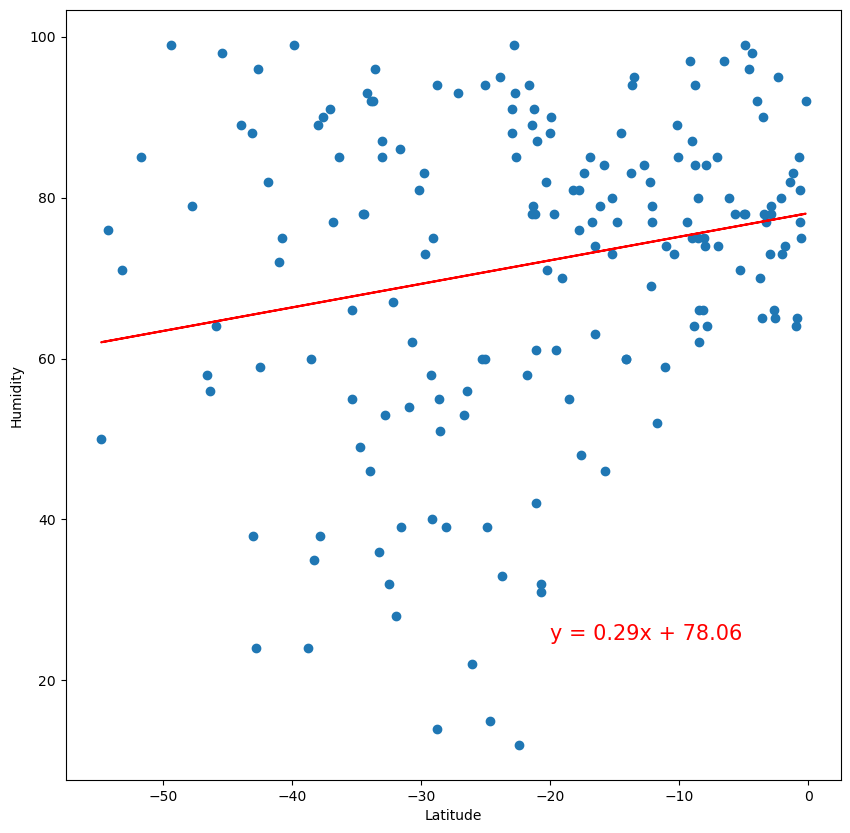

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = "Humidity"
location = (-20,25)
line_regress(x_values, y_values, title, location)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05836449724936233


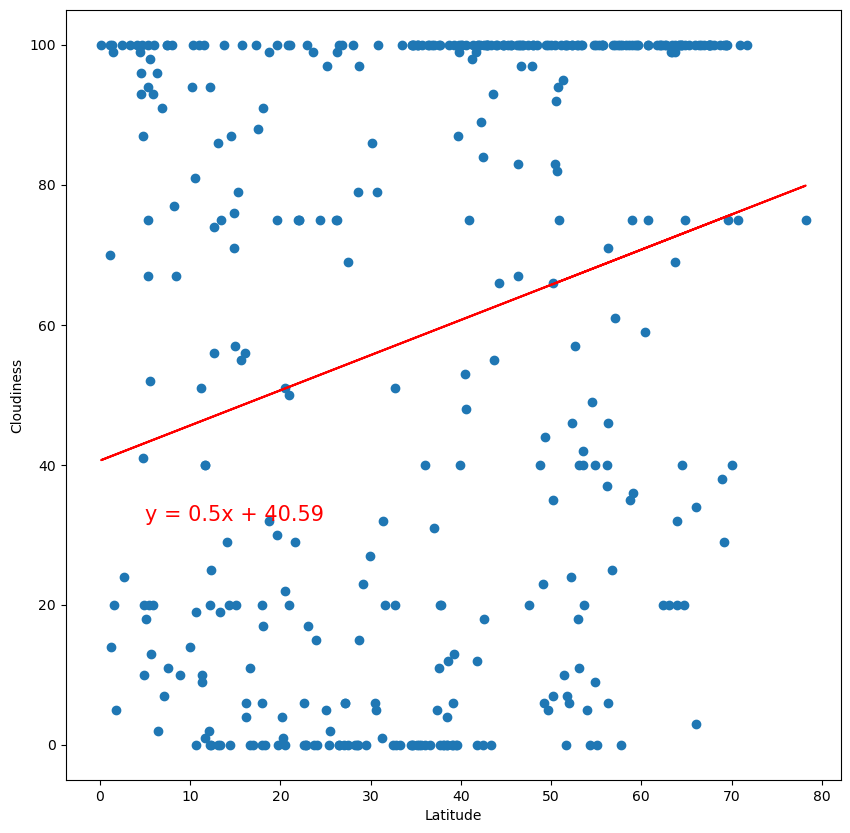

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = "Cloudiness"
location = (5,32)
line_regress(x_values, y_values, title, location)

The r-squared is: 0.010287819397371344


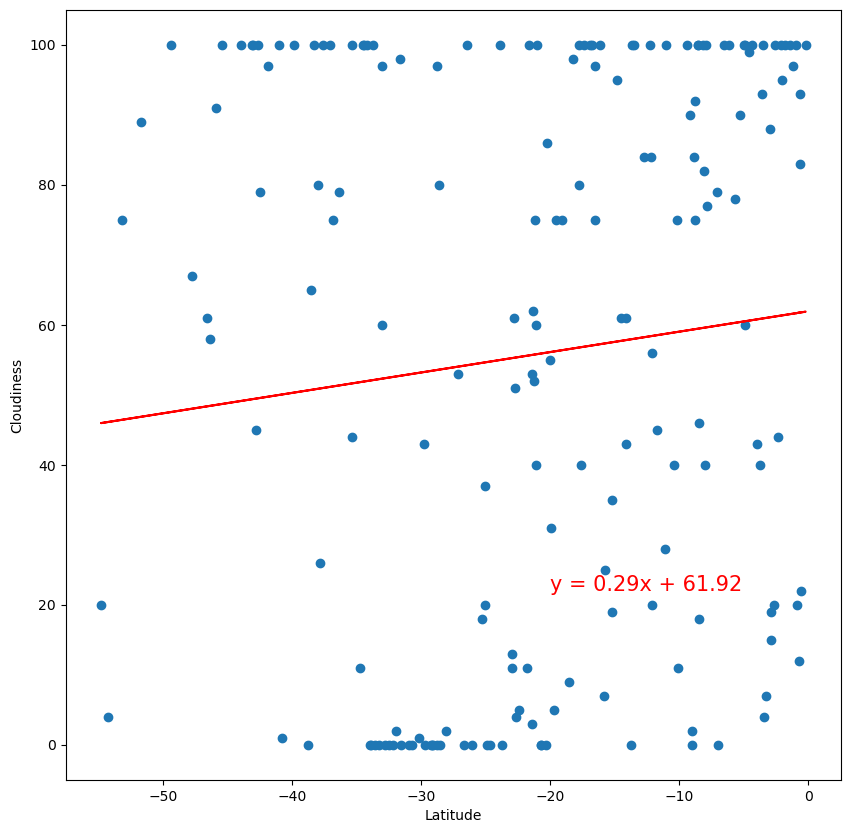

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = "Cloudiness"
location = (-20,22)
line_regress(x_values, y_values, title, location)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.008749131619083845


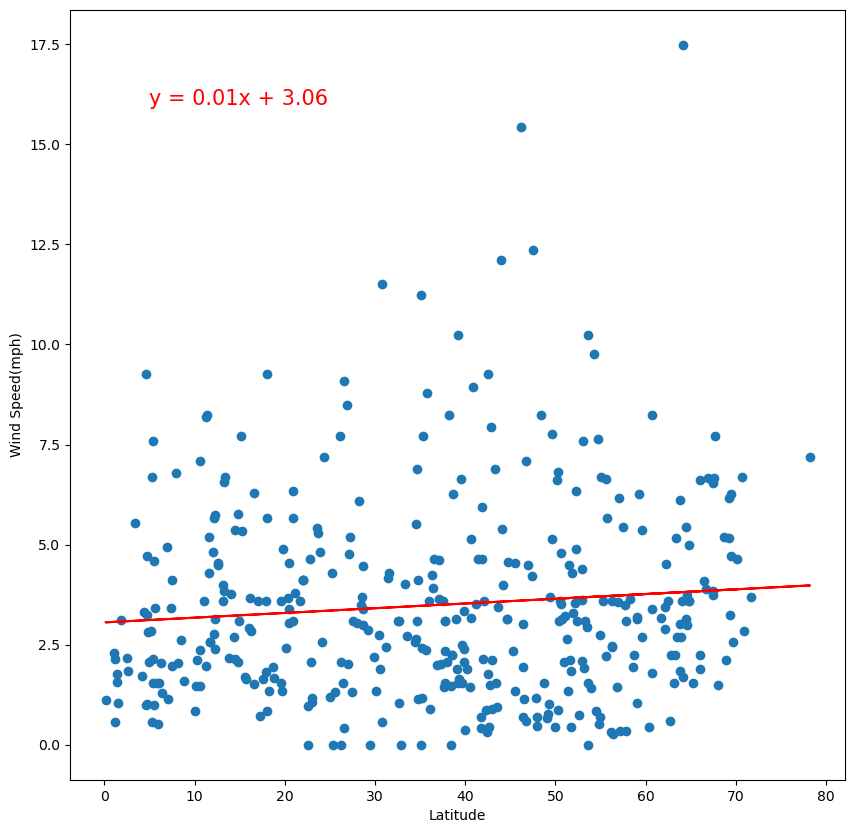

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title = "Wind Speed(mph)"
location = (5,16)
line_regress(x_values, y_values, title, location)

The r-squared is: 0.07162729882666473


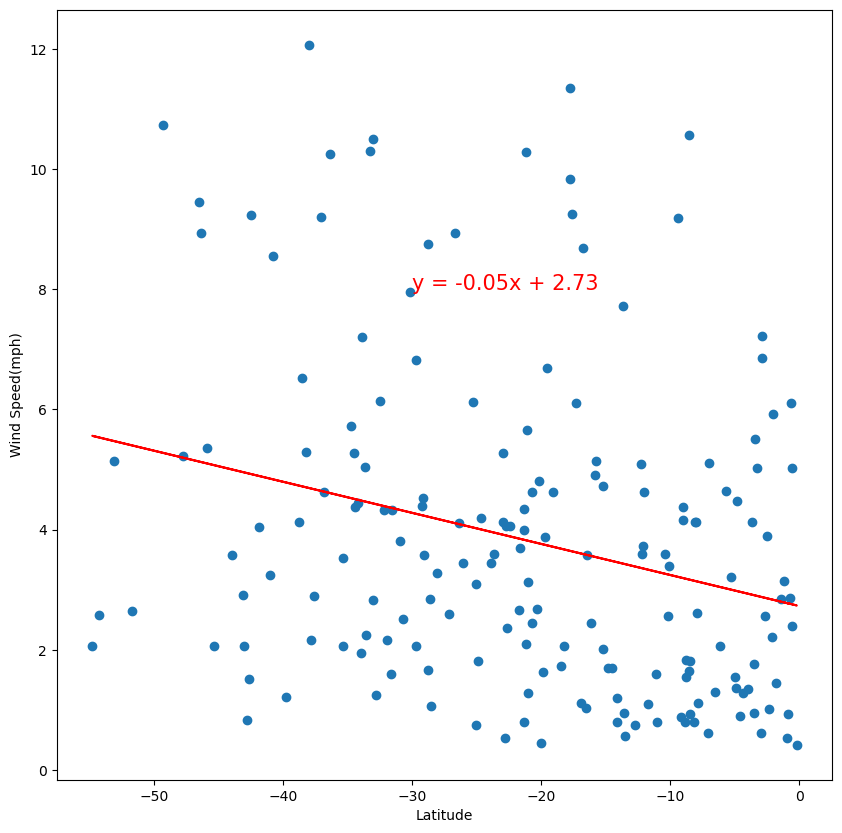

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = "Wind Speed(mph)"
location = (-30,8)
line_regress(x_values, y_values, title, location)

**Discussion about the linear relationship:** YOUR RESPONSE HERE